In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='U',
    map_property=lambda t: get_property(t, "U"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [67.45524952933131, 2.28001449972853, 0.5712248043685344, 0.22211419949925046, 0.126350340383468, 0.0886714663386488, 0.06483604659057397, 0.048330977629143713, 0.03781508230534052, 0.03044712760118944, 0.02505918306818407, 0.021441487104337978, 0.018688460131138385, 0.016256879767320747, 0.014295038180660994, 0.012738205326746431, 0.011284886917851707, 0.01014587817458109, 0.009225085552179066, 0.008283340148587413, 0.007195075219328747, 0.006589465153127144, 0.006066331154808143, 0.005525434325876838, 0.005123683996570542, 0.004750294529734424, 0.0044173463969562335, 0.004124591082988478, 0.003854116338278093, 0.0035730715204846442, 0.0031907572397275553, 0.0030150206716026396, 0.002836952518395331, 0.002690685067536144, 0.00258276022297696, 0.0024557604343566266, 0.0023400170915610953, 0.0022376326068780207, 0.002118784938164585, 0.00201795208967343, 0.0018449834739797622, 0.0017694728998792872, 0.0017126290522701151, 0.0016609808791077244, 0.001598337616520143, 0.001567663974709344, 0.0015204727164469945, 0.0014424436491373427, 0.001426692916468493, 0.0013766836130862225, 0.0012327093861068054, 0.0012013869082996547, 0.0011531578239864307, 0.0011303787073246845, 0.0011043752963434056, 0.0010687718202972583, 0.0010536984383558263, 0.0010061992024574342, 0.000994864889075144, 0.0009690822389143558, 0.0008741966985946919, 0.0008660778929784678, 0.0008407431968922255, 0.0008269910130122794, 0.0007977620244012936, 0.0007779694510833438, 0.000775645809096122, 0.000751141906041983, 0.0007408156687613458, 0.0007398414369013793, 0.0006630856733055883, 0.0006578647618175272, 0.0006458449418488245, 0.0006334727326568577, 0.0006022634675320336, 0.0006061943790886961, 0.0005968039345897849, 0.0005827001780412275, 0.0005755352847801697, 0.0005652934791854456, 0.0005158372377619293, 0.0005093361834616581, 0.0005051499615536093, 0.0004940036320888676, 0.0004901224793576439, 0.0004767831899233905, 0.0004807388416870719, 0.000474931833335554, 0.00045998904763305175, 0.00045250558709925443, 0.00042299718464980374, 0.0004172841689012924, 0.00040652243536378195, 0.0004046339891807593, 0.00040109762679512806, 0.0003993720621279876, 0.00039052455981349564, 0.0003881135384138764, 0.0003830225028624644, 0.00037285414043153705]
</details>


<details>
  <summary>losses_val_mean</summary>
  [4.015682180703547, 1.054657739217927, 0.27298281798346374, 0.14315275725501767, 0.07517071849986948, 0.05530681189922056, 0.042032269616249576, 0.04866468965316775, 0.021262357394324524, 0.017570878201234773, 0.013961280050493687, 0.019764233399843414, 0.024013046296080018, 0.008534305545586, 0.009350160391431404, 0.00844843177970895, 0.009097195101341481, 0.006269401368993375, 0.008084811828602347, 0.0046056381461867515, 0.003436128302966474, 0.004478044594484452, 0.005001038716481857, 0.0035010426086539187, 0.006506937722702492, 0.009160863069458056, 0.0024221982599773382, 0.003309544242486777, 0.002230271673396793, 0.0017387360944103787, 0.002155563784742348, 0.0021360315611947847, 0.00646090160063518, 0.0016002794289363903, 0.0019234711201063601, 0.0012505829228038313, 0.0018330901205651146, 0.0009247891020479444, 0.001453119334651737, 0.001223201740564139, 0.0013213840451688108, 0.012623449559108189, 0.001166759181434769, 0.0008004182080112448, 0.0008547178150247449, 0.0008761178579558192, 0.0012745221240910243, 0.0008686482294964596, 0.0006600148455357535, 0.0006448119442668846, 0.0019962892664445765, 0.0005158174009599941, 0.0008896173750088487, 0.00044271309360755206, 0.0005415363420858509, 0.00043097213770358617, 0.0005650045191257672, 0.0006764723570444317, 0.0010180597116128346, 0.0008315918036935641, 0.0009962532992322667, 0.0007500503376728852, 0.00035743549149860475, 0.0008929790746622218, 0.0013826801433463917, 0.000667028161340922, 0.0006696566773506455, 0.0008851581596719167, 0.0012799576366942015, 0.00039331230135915024, 0.00039992415418934376, 0.00026606015668342165, 0.0004723695335655955, 0.00038697418741965884, 0.00027508569673080223, 0.0003455353166622396, 0.00043679147007641964, 0.0007658846992517933, 0.00024615879929122247, 0.00031523919130071955, 0.00035944175693404886, 0.00019024471377187014, 0.0003702033038009993, 0.0004568041939570668, 0.000335366384214314, 0.00019152243943972063, 0.00023031944299136488, 0.0008467669107483476, 0.0006444639272945129, 0.0005465876217726295, 0.0002907328332553406, 0.00018086828781042248, 0.0006031811381836985, 0.00017729195872409932, 0.00034150081963748885, 0.00013851274816189401, 0.0003122569302277551, 0.00018438317432533811, 0.00015687617678309323, 0.00014575638043141026]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [67.45524952933131, 2.28001449972853, 0.5712248043685344, 0.22211419949925046, 0.126350340383468, 0.0886714663386488, 0.06483604659057397, 0.048330977629143713, 0.03781508230534052, 0.03044712760118944, 0.02505918306818407, 0.021441487104337978, 0.018688460131138385, 0.016256879767320747, 0.014295038180660994, 0.012738205326746431, 0.011284886917851707, 0.01014587817458109, 0.009225085552179066, 0.008283340148587413, 0.007195075219328747, 0.006589465153127144, 0.006066331154808143, 0.005525434325876838, 0.005123683996570542, 0.004750294529734424, 0.0044173463969562335, 0.004124591082988478, 0.003854116338278093, 0.0035730715204846442, 0.0031907572397275553, 0.0030150206716026396, 0.002836952518395331, 0.002690685067536144, 0.00258276022297696, 0.0024557604343566266, 0.0023400170915610953, 0.0022376326068780207, 0.002118784938164585, 0.00201795208967343, 0.0018449834739797622, 0.0017694728998792872, 0.0017126290522701151, 0.0016609808791077244, 0.001598337616520143, 0.001567663974709344, 0.0015204727164469945, 0.0014424436491373427, 0.001426692916468493, 0.0013766836130862225, 0.0012327093861068054, 0.0012013869082996547, 0.0011531578239864307, 0.0011303787073246845, 0.0011043752963434056, 0.0010687718202972583, 0.0010536984383558263, 0.0010061992024574342, 0.000994864889075144, 0.0009690822389143558, 0.0008741966985946919, 0.0008660778929784678, 0.0008407431968922255, 0.0008269910130122794, 0.0007977620244012936, 0.0007779694510833438, 0.000775645809096122, 0.000751141906041983, 0.0007408156687613458, 0.0007398414369013793, 0.0006630856733055883, 0.0006578647618175272, 0.0006458449418488245, 0.0006334727326568577, 0.0006022634675320336, 0.0006061943790886961, 0.0005968039345897849, 0.0005827001780412275, 0.0005755352847801697, 0.0005652934791854456, 0.0005158372377619293, 0.0005093361834616581, 0.0005051499615536093, 0.0004940036320888676, 0.0004901224793576439, 0.0004767831899233905, 0.0004807388416870719, 0.000474931833335554, 0.00045998904763305175, 0.00045250558709925443, 0.00042299718464980374, 0.0004172841689012924, 0.00040652243536378195, 0.0004046339891807593, 0.00040109762679512806, 0.0003993720621279876, 0.00039052455981349564, 0.0003881135384138764, 0.0003830225028624644, 0.00037285414043153705]
losses_val_mean_MSE_Ha = [4.015682180703547, 1.054657739217927, 0.27298281798346374, 0.14315275725501767, 0.07517071849986948, 0.05530681189922056, 0.042032269616249576, 0.04866468965316775, 0.021262357394324524, 0.017570878201234773, 0.013961280050493687, 0.019764233399843414, 0.024013046296080018, 0.008534305545586, 0.009350160391431404, 0.00844843177970895, 0.009097195101341481, 0.006269401368993375, 0.008084811828602347, 0.0046056381461867515, 0.003436128302966474, 0.004478044594484452, 0.005001038716481857, 0.0035010426086539187, 0.006506937722702492, 0.009160863069458056, 0.0024221982599773382, 0.003309544242486777, 0.002230271673396793, 0.0017387360944103787, 0.002155563784742348, 0.0021360315611947847, 0.00646090160063518, 0.0016002794289363903, 0.0019234711201063601, 0.0012505829228038313, 0.0018330901205651146, 0.0009247891020479444, 0.001453119334651737, 0.001223201740564139, 0.0013213840451688108, 0.012623449559108189, 0.001166759181434769, 0.0008004182080112448, 0.0008547178150247449, 0.0008761178579558192, 0.0012745221240910243, 0.0008686482294964596, 0.0006600148455357535, 0.0006448119442668846, 0.0019962892664445765, 0.0005158174009599941, 0.0008896173750088487, 0.00044271309360755206, 0.0005415363420858509, 0.00043097213770358617, 0.0005650045191257672, 0.0006764723570444317, 0.0010180597116128346, 0.0008315918036935641, 0.0009962532992322667, 0.0007500503376728852, 0.00035743549149860475, 0.0008929790746622218, 0.0013826801433463917, 0.000667028161340922, 0.0006696566773506455, 0.0008851581596719167, 0.0012799576366942015, 0.00039331230135915024, 0.00039992415418934376, 0.00026606015668342165, 0.0004723695335655955, 0.00038697418741965884, 0.00027508569673080223, 0.0003455353166622396, 0.00043679147007641964, 0.0007658846992517933, 0.00024615879929122247, 0.00031523919130071955, 0.00035944175693404886, 0.00019024471377187014, 0.0003702033038009993, 0.0004568041939570668, 0.000335366384214314, 0.00019152243943972063, 0.00023031944299136488, 0.0008467669107483476, 0.0006444639272945129, 0.0005465876217726295, 0.0002907328332553406, 0.00018086828781042248, 0.0006031811381836985, 0.00017729195872409932, 0.00034150081963748885, 0.00013851274816189401, 0.0003122569302277551, 0.00018438317432533811, 0.00015687617678309323, 0.00014575638043141026]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE U, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE U, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.06297643298519434

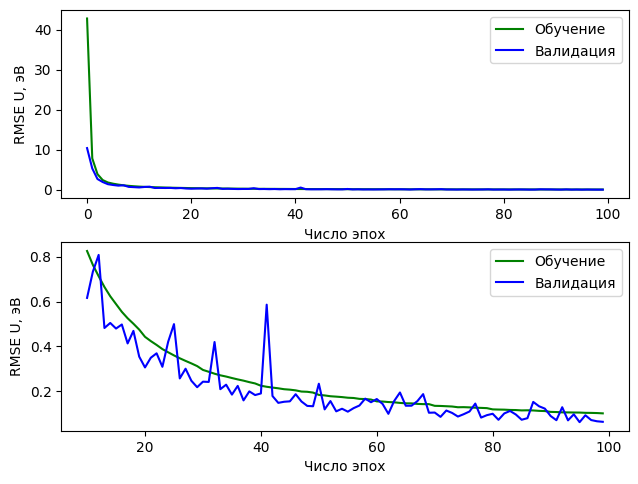